# 学习曲线

In [22]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
boston = datasets.load_boston()

In [23]:
X = boston.data
y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 666)
SD = StandardScaler()
SD.fit(X_train);
X_train = SD.transform(X_train)
X_test = SD.transform(X_test)

In [26]:
n_s = len(X_train);
train_score = []
test_score = []
for i in range(1,101,1):
    samples = (int)(n_s * 0.01 * i);
    LR = LinearRegression(n_jobs = -1);
    LR.fit(X_train[:samples,:],y_train[:samples]);
    train_s = mean_squared_error(y_train[:samples],LR.predict(X_train[:samples,:]))
    test_s = mean_squared_error(y_test,LR.predict(X_test))
    train_score.append(train_s);
    test_score.append(test_s);

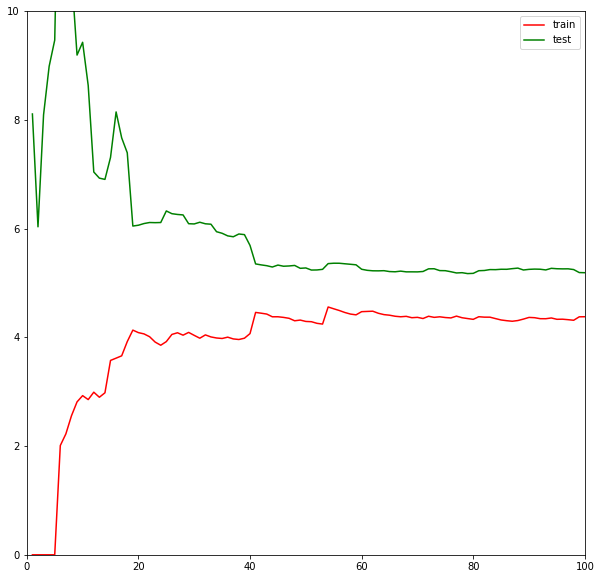

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10,10))
plt.plot(np.arange(1,101,1),np.sqrt(train_score),'r-',label = 'train');
plt.plot(np.arange(1,101,1),np.sqrt(test_score),'g-',label = "test");
plt.legend()
plt.axis([0,100,0,10])
plt.show()

# 学习曲线函数

In [65]:
def LearningCurve(estimator,X_train,X_test,y_train,y_test):
    n_samples = len(X_train);
    train_score = [];
    test_score = [];
    for i in range(1,101,1):
        samples = (int)(n_samples * 0.01 * i);
        ES = estimator;
        ES.fit(X_train[:samples],y_train[:samples]);
        train_s = mean_squared_error(y_train[:samples],ES.predict(X_train[:samples]));
        test_s = mean_squared_error(y_test,ES.predict(X_test));
        train_score.append(train_s);
        test_score.append(test_s);
    plt.figure(figsize = (10,10));
    plt.plot(np.arange(1,101,1),np.sqrt(train_score),'r',linewidth = 3,label = "train curve");
    plt.plot(np.arange(1,101,1),np.sqrt(test_score),'g',linewidth = 3,label = "test curve");
    plt.ylim((0,10))
    plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [67]:
X = boston.data
y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 666)
SD = StandardScaler()
SD.fit(X_train);
X_train = SD.transform(X_train)
X_test = SD.transform(X_test)

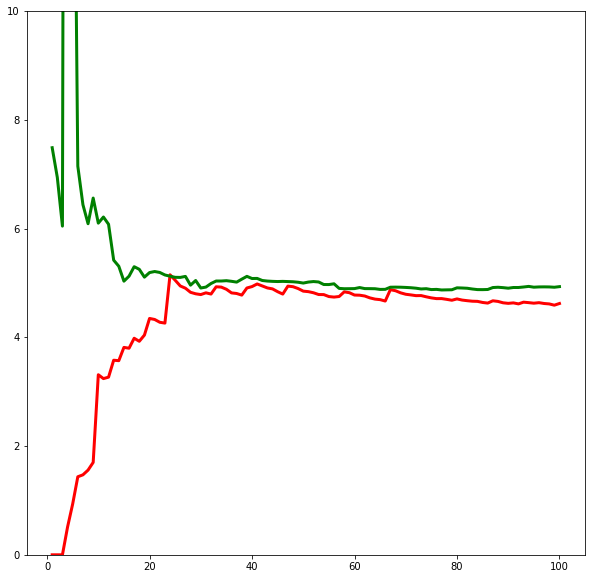

In [68]:
LearningCurve(LinearRegression(),X_train,X_test,y_train,y_test)